<a href="https://colab.research.google.com/github/shemi024/regression-correlation/blob/main/weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data=pd.read_csv('/content/drive/MyDrive/seattle-weather.csv')

In [20]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [21]:
data.columns


Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [22]:
data.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

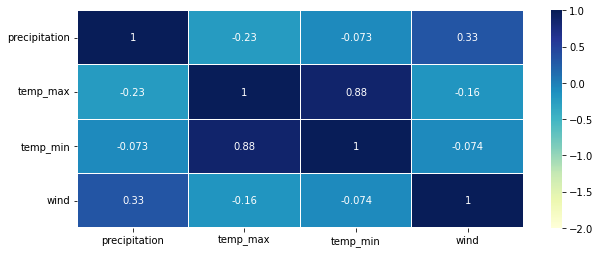

In [23]:
corrmatrix = data.corr()
plt.subplots(figsize =(10,4))
sns.heatmap(corrmatrix, vmin=-2, vmax=1, annot = True, linewidths=0.2, cmap='YlGnBu')

In [24]:
data.drop('date',axis=1)

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


In [25]:
data=pd.get_dummies(data)
data.head()

,precipitation,temp_max,temp_min,wind,date_2012-01-01,date_2012-01-02,date_2012-01-03,date_2012-01-04,date_2012-01-05,date_2012-01-06,date_2012-01-07,date_2012-01-08,date_2012-01-09,date_2012-01-10,date_2012-01-11,date_2012-01-12,date_2012-01-13,date_2012-01-14,date_2012-01-15,date_2012-01-16,date_2012-01-17,date_2012-01-18,date_2012-01-19,date_2012-01-20,date_2012-01-21,date_2012-01-22,date_2012-01-23,date_2012-01-24,date_2012-01-25,date_2012-01-26,date_2012-01-27,date_2012-01-28,date_2012-01-29,date_2012-01-30,date_2012-01-31,date_2012-02-01,date_2012-02-02,date_2012-02-03,date_2012-02-04,date_2012-02-05,...,date_2015-11-27,date_2015-11-28,date_2015-11-29,date_2015-11-30,date_2015-12-01,date_2015-12-02,date_2015-12-03,date_2015-12-04,date_2015-12-05,date_2015-12-06,date_2015-12-07,date_2015-12-08,date_2015-12-09,date_2015-12-10,date_2015-12-11,date_2015-12-12,date_2015-12-13,date_2015-12-14,date_2015-12-15,date_2015-12-16,date_2015-12-17,date_2015-12-18,date_2015-12-19,date_2015-12-20,date_2015-12-21,date_2015-12-22,date_2015-12-23,date_2015-12-24,date_2015-12-25,date_2015-12-26,date_2015-12-27,date_2015-12-28,date_2015-12-29,date_2015-12-30,date_2015-12-31,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
0,0.0,12.8,5.0,4.7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,10.9,10.6,2.8,4.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.8,11.7,7.2,2.3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,20.3,12.2,5.6,4.7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1.3,8.9,2.8,6.1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [26]:
x=data.drop('temp_max',axis=1)
y=data['temp_max']


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_tarin,y_test=train_test_split(x,y,random_state=42,test_size=0.25)


In [28]:
from sklearn import  linear_model
lr=linear_model.LinearRegression()
model = lr.fit(x_train,y_tarin)

In [29]:
#predict the output
predictions = model.predict(x_test)

In [30]:
print(y_test)

892     23.9
1105     7.8
413      9.4
522     26.7
1036    13.3
        ... 
243     22.2
1342    18.3
1057    12.8
1418     8.9
1023    16.1
Name: temp_max, Length: 366, dtype: float64


In [31]:
print(predictions)

[21.92332913 11.9923068   9.95864095 23.27636837 13.31317763 23.18260515
 23.63477158 12.56889406 17.24842683 21.2722145  24.5852893  24.60293662
 18.37570155 24.02241128 10.45556976 12.02512412 22.32524926 13.95180945
 15.91184501  9.19405363 16.99203662 14.16562891 18.93315531  5.8192132
 23.18484526 12.44555402 10.45003259 18.18885059  8.51531351 28.01976336
 16.96997236 24.5852893  18.594739    5.97571182 25.34897953 13.26101212
 17.57789077  4.63728948 18.82260243 19.89483627 13.6849965  21.36927477
 14.58527676 26.59613484 18.37414747 15.8068472  12.90701679 10.94232133
 22.91104494 22.6781957  22.62525374 16.0940001  22.42230953 18.65676801
  9.86281558 16.0136941  11.20858523 26.6490768  10.54183868 23.92535101
 11.69490412 26.00009416  5.78325059  5.72215293 25.26956658 18.86142545
 10.43087795 28.01976336 13.29536195 14.96456203 17.63561828 15.80596108
 11.10997089  4.06587275 16.72818923 21.21927253 22.17097187  8.50095269
  5.85565696  6.72443157  8.69928374 10.84907396  9.

In [32]:
from sklearn.metrics import mean_squared_error
print('MSC is:',mean_squared_error(y_test,predictions))

MSC is: 7.795171208084072
